# Librerias

In [1]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import os
import pathlib
from pathlib import Path  

In [2]:
from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from spectral_metric.estimator import CumulativeGradientEstimator
from spectral_metric.visualize import make_graph

# DATASET DESDE DIRECTORIO 

In [3]:
# Lectura de dataset
directorio_dataset = ('../Datasets/CIFAR-10')
directorio_dataset = pathlib.Path(directorio_dataset)

# Lectura de la carpeta train
directorio_train = ('../Datasets/CIFAR-10/train')
directorio_train = pathlib.Path(directorio_train)

# Lectura de la carpeta test
directorio_test = ('../Datasets/CIFAR-10/test')
directorio_test = pathlib.Path(directorio_test)


total_dataset = len(list(directorio_dataset.glob('*/*/*.png')))  # Cuenta la cantidad de imagenes del dataset (Aqui busca en las subcarpetas del directorio del dataset)
total_train = len(list(directorio_train.glob('*/*.png')))  # Cuenta la cantidad de imagenes de train
total_test = len(list(directorio_test.glob('*/*.png')))  # Cuenta la cantidad de imagenes de test

print(f"Total imagenes dataset: {total_dataset}")
print(f"Total imagenes train: {total_train}")
print(f"Total imagenes test: {total_test}")

Total imagenes dataset: 60000
Total imagenes train: 50000
Total imagenes test: 10000


In [4]:
# Dimensiones de imagen y tamaño de batch
img_height = 32
img_width = 32
#batch_size = 32
batch_size_train = total_train

In [5]:

import tensorflow as tf
import pathlib

# Data splitting (entrenamiento y validación)
train_images = tf.keras.preprocessing.image_dataset_from_directory(
  directorio_train,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size_train)

Found 50000 files belonging to 10 classes.


In [6]:
# Dimensiones de imagen y tamaño de batch
img_height = 32
img_width = 32
#batch_size = 32
batch_size_test = total_test

In [7]:
# Data splitting (entrenamiento y validación)
test_images = tf.keras.preprocessing.image_dataset_from_directory(
  directorio_test,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size_test)

Found 10000 files belonging to 10 classes.


In [8]:
# Contar el total de imágenes por clase en train y test
class_counts_total = {p.name: len(list(p.glob('*.png'))) for p in directorio_dataset.glob('*/*')}
class_counts_train = {p.name: len(list(p.glob('*.png'))) for p in directorio_train.glob('*')}
class_counts_test = {p.name: len(list(p.glob('*.png'))) for p in directorio_test.glob('*')}




# Mostrar el total de imágenes por clase en train
print("\nTotal de imágenes por clase en train:")
for class_name, count in class_counts_train.items():
    print(f"Clase: {class_name}, Número de imágenes: {count}")
print(f"Total imagenes train: {total_train}")

# Mostrar el total de imágenes por clase en test
print("\nTotal de imágenes por clase en test:")
for class_name, count in class_counts_test.items():
    print(f"Clase: {class_name}, Número de imágenes: {count}")
print(f"Total imagenes test: {total_test}")


Total de imágenes por clase en train:
Clase: airplane_train, Número de imágenes: 5000
Clase: automobile_train, Número de imágenes: 5000
Clase: bird_train, Número de imágenes: 5000
Clase: cat_train, Número de imágenes: 5000
Clase: deer_train, Número de imágenes: 5000
Clase: dog_train, Número de imágenes: 5000
Clase: frog_train, Número de imágenes: 5000
Clase: horse_train, Número de imágenes: 5000
Clase: ship_train, Número de imágenes: 5000
Clase: truck_train, Número de imágenes: 5000
Total imagenes train: 50000

Total de imágenes por clase en test:
Clase: airplane_test, Número de imágenes: 1000
Clase: automobile_test, Número de imágenes: 1000
Clase: bird_test, Número de imágenes: 1000
Clase: cat_test, Número de imágenes: 1000
Clase: deer_test, Número de imágenes: 1000
Clase: dog_test, Número de imágenes: 1000
Clase: frog_test, Número de imágenes: 1000
Clase: horse_test, Número de imágenes: 1000
Clase: ship_test, Número de imágenes: 1000
Clase: truck_test, Número de imágenes: 1000
Total

In [9]:
# Nombres de las clases
class_names_train = list(class_counts_train.keys())
class_names_test = list(class_counts_test.keys())
#class_names_total = sorted(list(set(class_names_train + class_names_test)))
class_names_total = list(class_counts_total.keys())

# Mostrar el número de clases y los nombres
print(f"\nNúmero de clases en train: {len(class_names_train)}")
print(f"Nombres de las clases en train: {class_names_train}")

print(f"\nNúmero de clases en test: {len(class_names_test)}")
print(f"Nombres de las clases en test: {class_names_test}")

print(f"\nNúmero total de clases en el dataset: {len(class_names_total)}")   # Este valor cambio si el nombre de las clases es diferente
print(f"Nombres de todas las clases en el dataset: {class_names_total}")     # Este valor tambien cambia si el nombre de las clases es diferente


Número de clases en train: 10
Nombres de las clases en train: ['airplane_train', 'automobile_train', 'bird_train', 'cat_train', 'deer_train', 'dog_train', 'frog_train', 'horse_train', 'ship_train', 'truck_train']

Número de clases en test: 10
Nombres de las clases en test: ['airplane_test', 'automobile_test', 'bird_test', 'cat_test', 'deer_test', 'dog_test', 'frog_test', 'horse_test', 'ship_test', 'truck_test']

Número total de clases en el dataset: 20
Nombres de todas las clases en el dataset: ['airplane_test', 'automobile_test', 'bird_test', 'cat_test', 'deer_test', 'dog_test', 'frog_test', 'horse_test', 'ship_test', 'truck_test', 'airplane_train', 'automobile_train', 'bird_train', 'cat_train', 'deer_train', 'dog_train', 'frog_train', 'horse_train', 'ship_train', 'truck_train']


In [10]:
for images, labels0 in train_images.take(1):  # only take first element of dataset
    numpy_all_images = images.numpy()  # convertir el tensor de imágenes en un arreglo de numpy y ahora contiene las imágenes del conjunto de datos en formato de numpy.
    numpy_all_labels = labels0.numpy()  # convierte el tensor de etiquetas en un arreglo de numpy y ahora contiene las etiquetas del conjunto de datos en formato de numpy

numpy_all_images /= 255.0  # Scale the features to the [0, 1] range
print(numpy_all_images.shape)

(50000, 32, 32, 3)


# CSG

c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\spectral_metric\visualize.py:48: RuntimeWarning: divide by zero encountered in divide
  similarities = difference.max() / difference * 100
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\spectral_metric\visualize.py:59: UserWarning: This figure includes Axes that ar

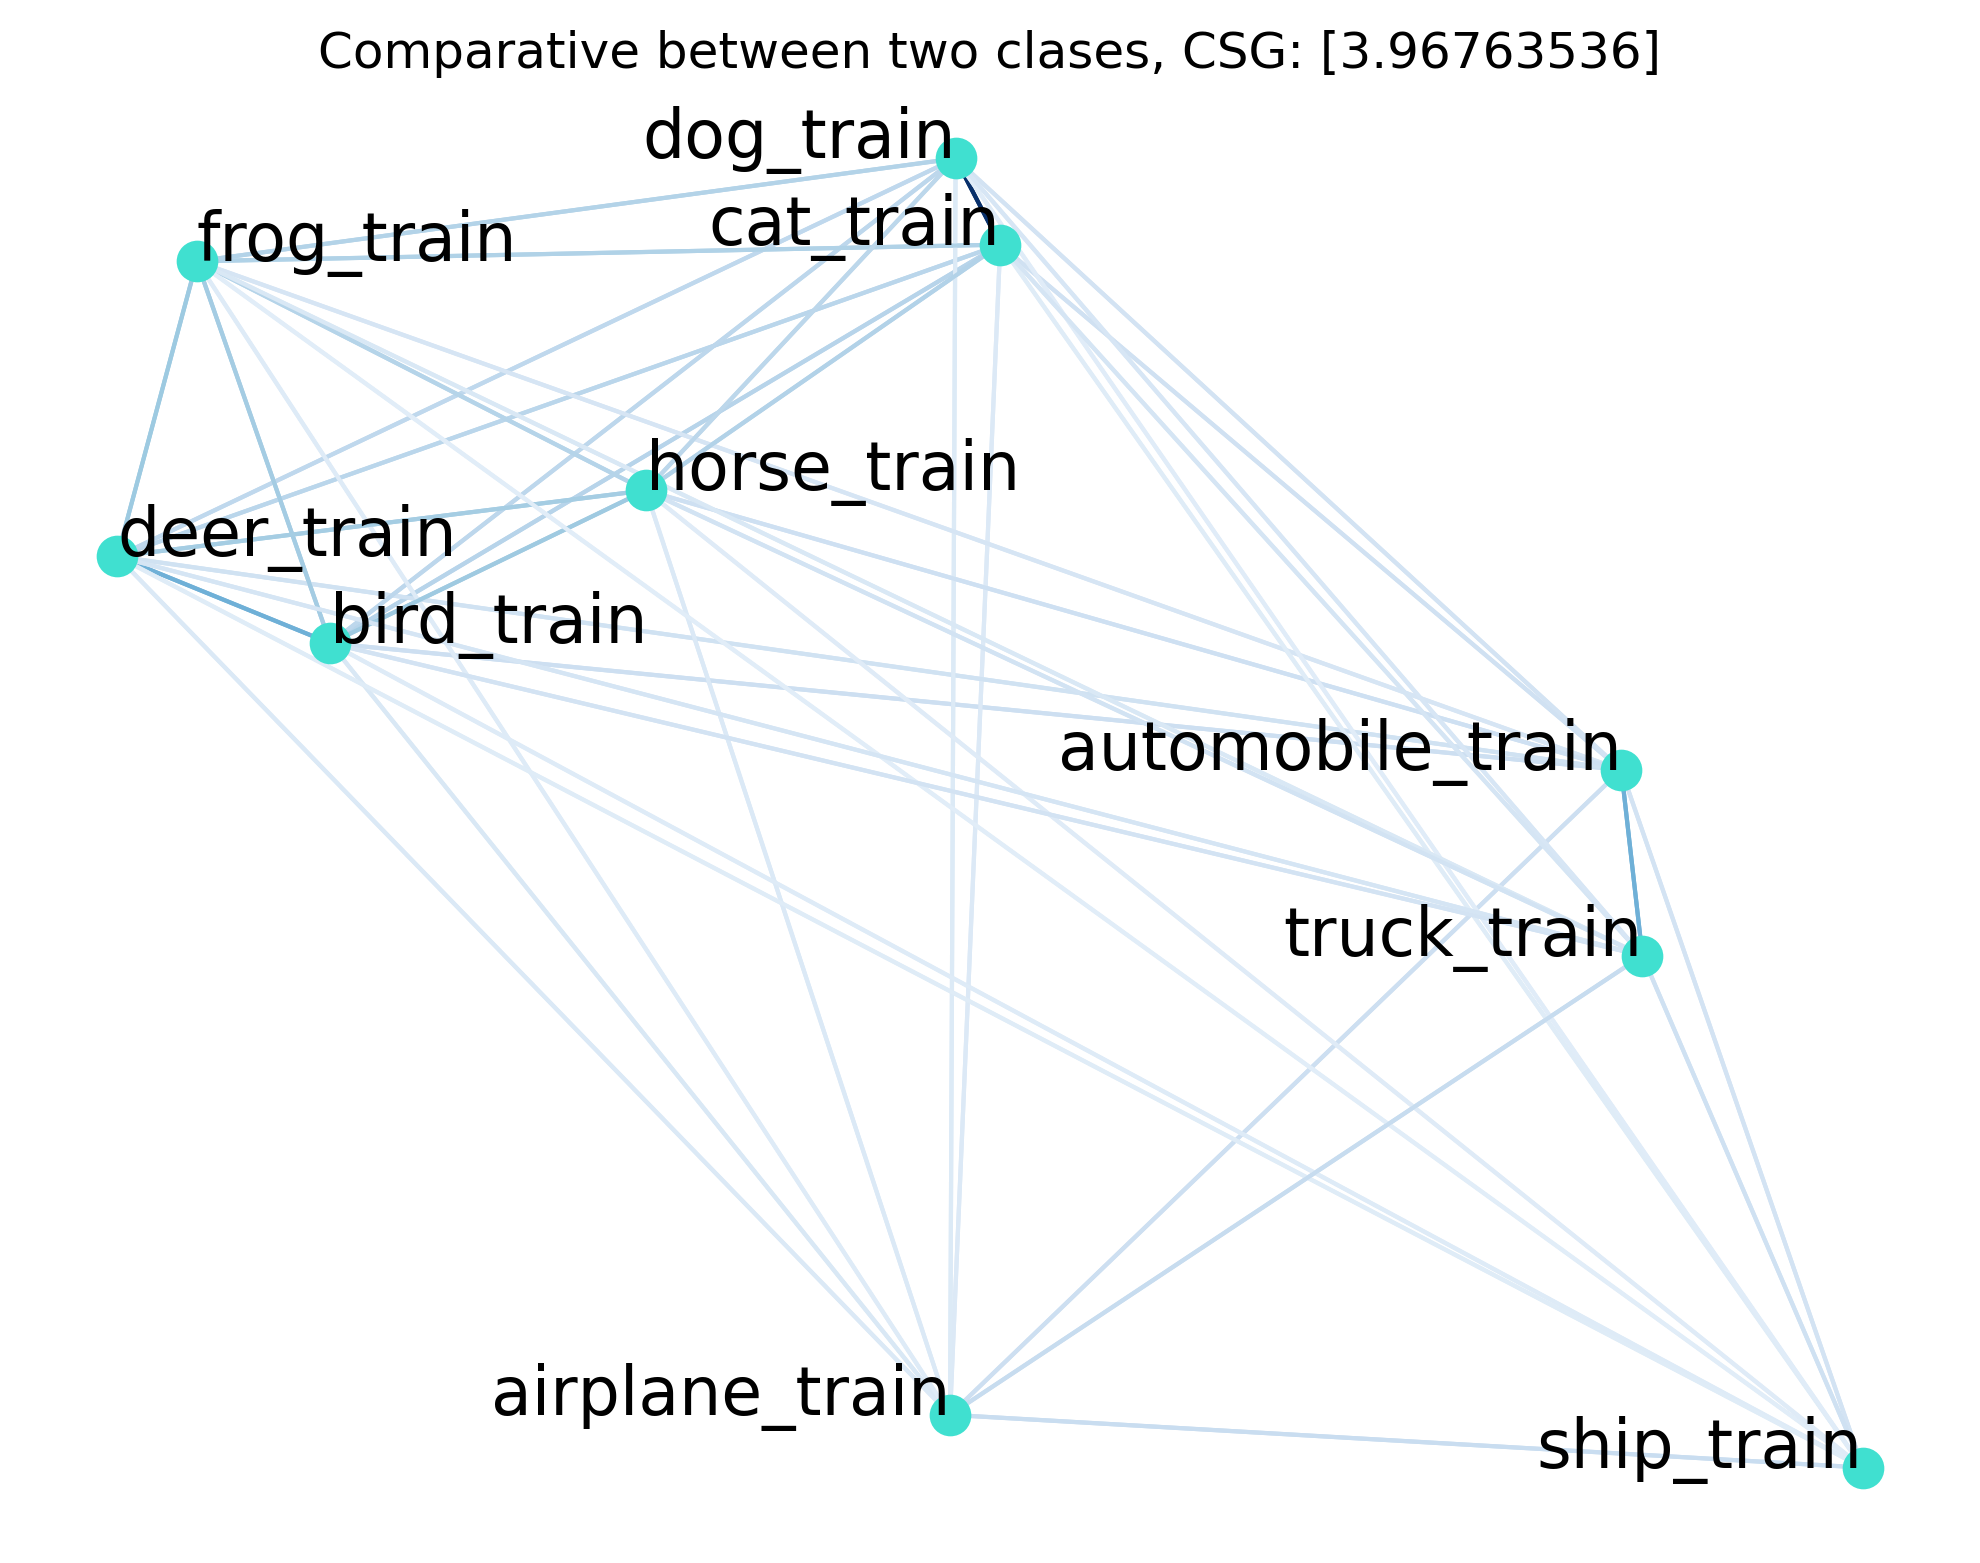

In [12]:
# CIFAR-10 Two classes
fully_dataset = numpy_all_images.reshape((numpy_all_images.shape[0], numpy_all_images.shape[1]*numpy_all_images.shape[2]*numpy_all_images.shape[3])) # es un arreglo bidimensional donde cada fila representa una imagen y cada columna representa un píxel de la imagen
fully_labels = numpy_all_labels.reshape(numpy_all_labels.shape[0],)

estimator = CumulativeGradientEstimator(M_sample=1000, k_nearest=10)
estimator.fit(data=fully_dataset, target=fully_labels)
csg = estimator.csg  # The actual complexity values.
estimator.evals, estimator.evecs  # The eigenvalues and vectors.

make_graph(estimator.difference, title="Comparative between two clases, CSG: "+str(csg), classes=class_names_train)

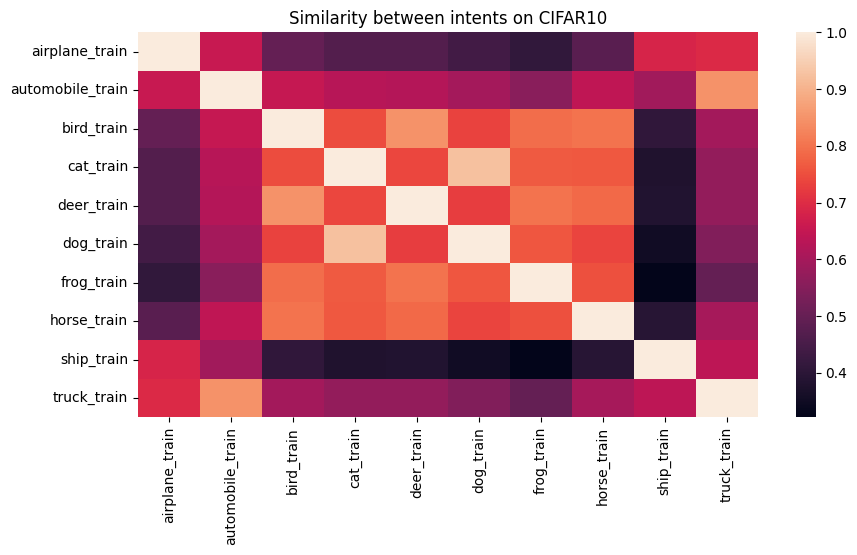

In [14]:
plt.figure(figsize=(10,5))
# Establecer las etiquetas del eje y con los nombres de las clases
sns.heatmap(estimator.W, xticklabels=class_names_train, yticklabels=class_names_train)
plt.title("Similarity between intents on CIFAR10")
plt.show()

In [16]:

from scipy.stats import entropy
import pandas as pd

entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)
print("Class that is the least confused (lowest entropy):", class_names_train[np.argmax(entropy_per_class)])


Class that is the most confused (highest entropy): automobile_train


Comparar clases con la matriz W

In [27]:
pairs = list(zip(*np.unravel_index(np.argsort(estimator.W, axis=None), estimator.W.shape)))[::-1]
pairs = [(i,j) for i,j in pairs if i != j]
print("Most similar pairs")
lst = []
for idx, (i,j) in enumerate(pairs[::2][:10]):
    lst.append({"Intent pair" : f"{class_names_train[i]} <> {class_names_train[j]}", "Similarity": estimator.W[i,j]})
print(pd.DataFrame(lst))

(10, 10)
Most similar pairs
                       Intent pair  Similarity
0           dog_train <> cat_train    0.925225
1  truck_train <> automobile_train    0.848000
2         deer_train <> bird_train    0.847600
3         deer_train <> frog_train    0.801000
4        bird_train <> horse_train    0.800000
5         bird_train <> frog_train    0.791500
6        deer_train <> horse_train    0.787600
7          frog_train <> cat_train    0.766511
8         cat_train <> horse_train    0.763098
9          frog_train <> dog_train    0.759909


Obtener los nombres de las imagenes

In [38]:
# Obtener todos los nombres de archivo en el dataset
filenames = [str(f) for f in directorio_train.glob('*/*.png')]

# Crear un mapeo de índices a rutas completas de archivo  
filenames_dict = {i: str(f) for i, f in enumerate(directorio_train.glob('*/*.png'))} 

Comparar las muestras con la matriz W

In [44]:
with open("most confused - CIFAR-10.txt", "w") as file:  
    def show_most_confused(source_intent, target_intent, estimator, class_names, filenames_dict):  
        file.write(f"{class_names[source_intent]} <> {class_names[target_intent]}\n")  
        
        probabilities = [sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()]  
        closest_to_second = np.argsort(probabilities)[::-1][:10]  
        dataset_indices = estimator.class_indices[source_intent][closest_to_second]  

        valid_indices = [int(di) for di in dataset_indices if int(di) < len(filenames_dict)]  
        
        for di in valid_indices:  
            try:  
                filename_route = filenames_dict[int(di)]  
                filename = Path(filename_route).name  
                value = probabilities[closest_to_second[np.where(dataset_indices == di)[0][0]]]  
                file.write(f"\tNombre del archivo: {filename}, Clase: {class_names[source_intent]}, Similitud: {value:.4f}\n")  
            except IndexError:  
                file.write(f"\tIndexError: Index {int(di)} is out of bounds for the dataset.\n")  

    # Generar pares de clases  
    num_classes = len(class_names_train)  
    for i in range(num_classes - 1):  
        pair = (i, i + 1)  
        show_most_confused(pair[0], pair[1], estimator, class_names_train, filenames_dict)  
        show_most_confused(pair[1], pair[0], estimator, class_names_train, filenames_dict)

automobile_train <> deer_train


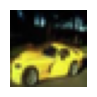

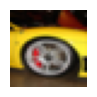

deer_train <> automobile_train


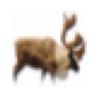

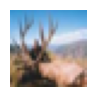

deer_train <> frog_train


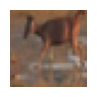

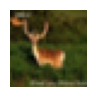

frog_train <> deer_train


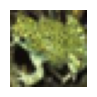

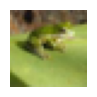

cat_train <> truck_train


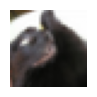

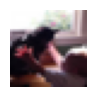

truck_train <> cat_train


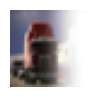

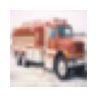

ship_train <> truck_train


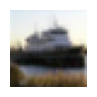

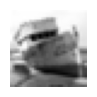

truck_train <> ship_train


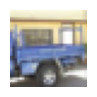

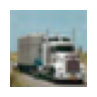

airplane_train <> bird_train


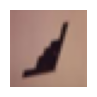

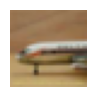

bird_train <> airplane_train


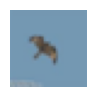

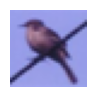

deer_train <> dog_train


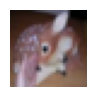

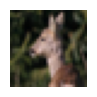

dog_train <> deer_train


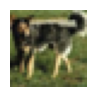

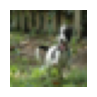

frog_train <> ship_train


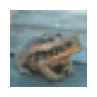

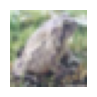

ship_train <> frog_train


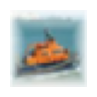

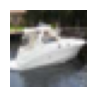

bird_train <> horse_train


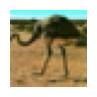

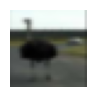

horse_train <> bird_train


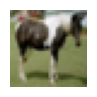

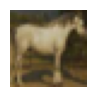

dog_train <> horse_train


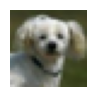

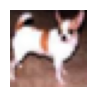

horse_train <> dog_train


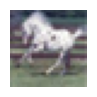

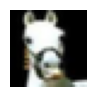

In [49]:
import matplotlib.pyplot as plt  
from itertools import combinations  
import random  

# Muestras más similares  
def show_most_confused(source_intent, target_intent, estimator, class_names, fully_dataset):  
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")  
    
    # Obtener las probabilidades de la clase objetivo  
    probabilities = [sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()]  
    
    # Ordenar en orden descendente (De más similar a menos similar) y tomar solo las 2 primeras  
    closest_to_second = np.argsort(probabilities)[::-1][:2]  
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]  

    for di in dataset_indices:  
        # Asegurarse de que el índice esté dentro de los límites  
        if int(di) < len(fully_dataset):  
            image = fully_dataset[int(di)]  
            
            # Convertir el vector 1D a una imagen 3D  
            if image.shape == (3072,):  
                image = image.reshape((32, 32, 3))  
            
            plt.figure(figsize=(1, 1))  
            plt.imshow(image)  
            plt.axis('off')  
            plt.show()  
        else:  
            print(f"Index {int(di)} is out of bounds for the dataset.")  

# Generar todos los pares de clases sin repetición  
num_classes = len(class_names_train)  
pairs = list(combinations(range(num_classes), 2))  

# Mezclar los pares para asegurar diversidad  
random.shuffle(pairs)  

# Mostrar imágenes para los primeros pares seleccionados  
for pair in pairs[:9]:  # Cambia el número según cuántos pares quieras mostrar  
    show_most_confused(pair[0], pair[1], estimator, class_names_train, fully_dataset)  
    show_most_confused(pair[1], pair[0], estimator, class_names_train, fully_dataset)


deer_train <> horse_train
(2,)
	Nombre del archivo: rangifer_caribou_s_000062.png, Clase: deer_train, Similitud: 7000.0000


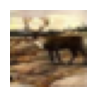

	Nombre del archivo: capreolus_capreolus_s_000364.png, Clase: deer_train, Similitud: 4000.0000


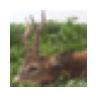

horse_train <> deer_train
(2,)
	Nombre del archivo: stallion_s_001842.png, Clase: horse_train, Similitud: 10000.0000


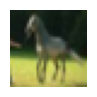

	Nombre del archivo: stud_mare_s_000246.png, Clase: horse_train, Similitud: 9000.0000


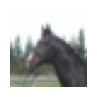

deer_train <> frog_train
(2,)
	Nombre del archivo: sambar_s_001011.png, Clase: deer_train, Similitud: 6000.0000


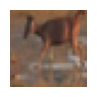

	Nombre del archivo: fallow_deer_s_000040.png, Clase: deer_train, Similitud: 6000.0000


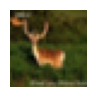

frog_train <> deer_train
(2,)
	Nombre del archivo: bufo_bufo_s_001156.png, Clase: frog_train, Similitud: 9000.0000


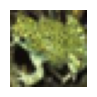

	Nombre del archivo: green_frog_s_000010.png, Clase: frog_train, Similitud: 8000.0000


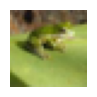

automobile_train <> horse_train
(2,)
	Nombre del archivo: convertible_s_000308.png, Clase: automobile_train, Similitud: 4000.0000


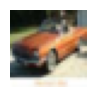

	Nombre del archivo: auto_s_002054.png, Clase: automobile_train, Similitud: 4000.0000


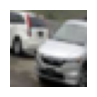

horse_train <> automobile_train
(2,)
	Nombre del archivo: gelding_s_002107.png, Clase: horse_train, Similitud: 3000.0000


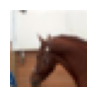

	Nombre del archivo: gelding_s_001503.png, Clase: horse_train, Similitud: 3000.0000


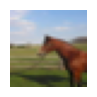

bird_train <> dog_train
(2,)
	Nombre del archivo: rhea_americana_s_000117.png, Clase: bird_train, Similitud: 7000.0000


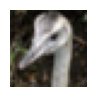

	Nombre del archivo: passerine_s_001590.png, Clase: bird_train, Similitud: 6000.0000


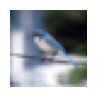

dog_train <> bird_train
(2,)
	Nombre del archivo: puppy_s_001551.png, Clase: dog_train, Similitud: 8000.0000


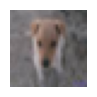

	Nombre del archivo: dog_s_001384.png, Clase: dog_train, Similitud: 8000.0000


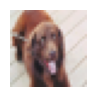

bird_train <> ship_train
(2,)
	Nombre del archivo: bird_s_000777.png, Clase: bird_train, Similitud: 10000.0000


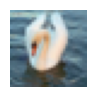

	Nombre del archivo: bird_s_002180.png, Clase: bird_train, Similitud: 9000.0000


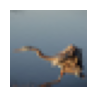

ship_train <> bird_train
(2,)
	Nombre del archivo: motorboat_s_001356.png, Clase: ship_train, Similitud: 6000.0000


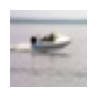

	Nombre del archivo: boat_s_000423.png, Clase: ship_train, Similitud: 5000.0000


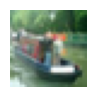

airplane_train <> bird_train
(2,)
	Nombre del archivo: stealth_bomber_s_002327.png, Clase: airplane_train, Similitud: 8000.0000


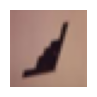

	Nombre del archivo: jetliner_s_001595.png, Clase: airplane_train, Similitud: 7000.0000


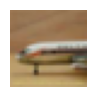

bird_train <> airplane_train
(2,)
	Nombre del archivo: accentor_s_001227.png, Clase: bird_train, Similitud: 9000.0000


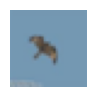

	Nombre del archivo: wagtail_s_000328.png, Clase: bird_train, Similitud: 9000.0000


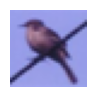

airplane_train <> dog_train
(2,)
	Nombre del archivo: jumbojet_s_000269.png, Clase: airplane_train, Similitud: 5000.0000


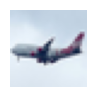

	Nombre del archivo: twinjet_s_001527.png, Clase: airplane_train, Similitud: 5000.0000


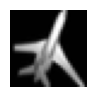

dog_train <> airplane_train
(2,)
	Nombre del archivo: chihuahua_s_000113.png, Clase: dog_train, Similitud: 8000.0000


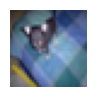

	Nombre del archivo: maltese_s_000356.png, Clase: dog_train, Similitud: 7000.0000


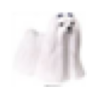

automobile_train <> dog_train
(2,)
	Nombre del archivo: estate_car_s_000976.png, Clase: automobile_train, Similitud: 5000.0000


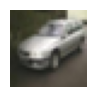

	Nombre del archivo: estate_car_s_000489.png, Clase: automobile_train, Similitud: 5000.0000


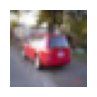

dog_train <> automobile_train
(2,)
	Nombre del archivo: toy_spaniel_s_000673.png, Clase: dog_train, Similitud: 4000.0000


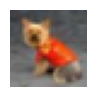

	Nombre del archivo: pekingese_s_001848.png, Clase: dog_train, Similitud: 3000.0000


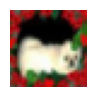

dog_train <> ship_train
(2,)
	Nombre del archivo: puppy_s_001353.png, Clase: dog_train, Similitud: 9000.0000


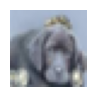

	Nombre del archivo: maltese_s_001423.png, Clase: dog_train, Similitud: 8000.0000


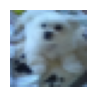

ship_train <> dog_train
(2,)
	Nombre del archivo: powerboat_s_000309.png, Clase: ship_train, Similitud: 5000.0000


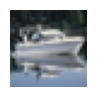

	Nombre del archivo: pontoon_s_002020.png, Clase: ship_train, Similitud: 5000.0000


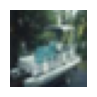

In [51]:
import matplotlib.pyplot as plt  
from itertools import combinations  
import random  
from pathlib import Path  

# Muestras más similares utilizando la matriz W  
def show_most_confused(source_intent, target_intent, estimator, class_names, filenames_dict):  
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")  
    
    # Obtener las probabilidades de la clase objetivo  
    probabilities = [sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()]  
    
    # Ordenar en orden descendente (De más similar a menos similar) y tomar solo las 2 primeras  
    closest_to_second = np.argsort(probabilities)[::-1][:2]  
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]  
    print(dataset_indices.shape)  

    # Verificar que los índices estén dentro de los límites del dataset  
    valid_indices = [int(di) for di in dataset_indices if int(di) < len(filenames_dict)]  
    
    for di in valid_indices:  
        try:  
            # filename ahora es la ruta completa  
            filename_route = filenames_dict[int(di)]  
            filename = Path(filename_route).name  
            value = probabilities[closest_to_second[np.where(dataset_indices == di)[0][0]]]  
            print(f"\tNombre del archivo: {filename}, Clase: {class_names[source_intent]}, Similitud: {value:.4f}")  
            
            # Cargar y mostrar la imagen  
            img = plt.imread(filename_route)  
            plt.figure(figsize=(1, 1))  
            plt.imshow(img)  
            plt.axis('off')  
            plt.show()  
            
        except IndexError:  
            print(f"\tIndexError: Index {int(di)} is out of bounds for the dataset.")  
        except FileNotFoundError:  
            print(f"\tFileNotFoundError: No such file: {filename_route}")  

# Generar todos los pares de clases sin repetición  
num_classes = len(class_names_train)  
pairs = list(combinations(range(num_classes), 2))  

# Mezclar los pares para asegurar diversidad  
random.shuffle(pairs)  

# Mostrar imágenes para los primeros pares seleccionados  
for pair in pairs[:9]:  # Cambia el número según cuántos pares quieras mostrar  
    show_most_confused(pair[0], pair[1], estimator, class_names_train, filenames_dict)  
    show_most_confused(pair[1], pair[0], estimator, class_names_train, filenames_dict)

Pruebas César

*   Extraer 10 muestras (archivos de imágenes) en orden 1
*   Extraer 10 muestras (archivos de imágenes) en orden -1
*   Entrenar un modelo con el dataset CIFAR10_2clases
*   Realizar predicción sobre las 20 imágenes (Cat/Cat_c)
*   Entrenar un modelo con el dataset CIFAR10
*   Realizar predicción sobre las 20 imágenes (airplane, automobile, bird,  cat, deer, dog, frog, horse, ship, truck)
*   Probar con el dataset Santiago


